In [67]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    try:
        value=sy.symbols('{0:.3f}'.format(r)+unidade)
    except:
        #print("symbolic")
        value=r
    display(pd.DataFrame([cell_vars()]).round(2).transpose())
    print('A resposta final é:')
    display(value)

def cell_vars(offset=0):
    import io
    from contextlib import redirect_stdout

    ipy = get_ipython()
    out = io.StringIO()

    with redirect_stdout(out):
        ipy.magic("history {0}".format(ipy.execution_count - offset))

    #process each line...
    x = out.getvalue().replace(" ", "").split("\n")
    x = [a.split("=")[0] for a in x if "=" in a] #all of the variables in the cell
    g = globals()
    result = {k:g[k] for k in x if k in g}
    return result


from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

<IPython.core.display.Math object>

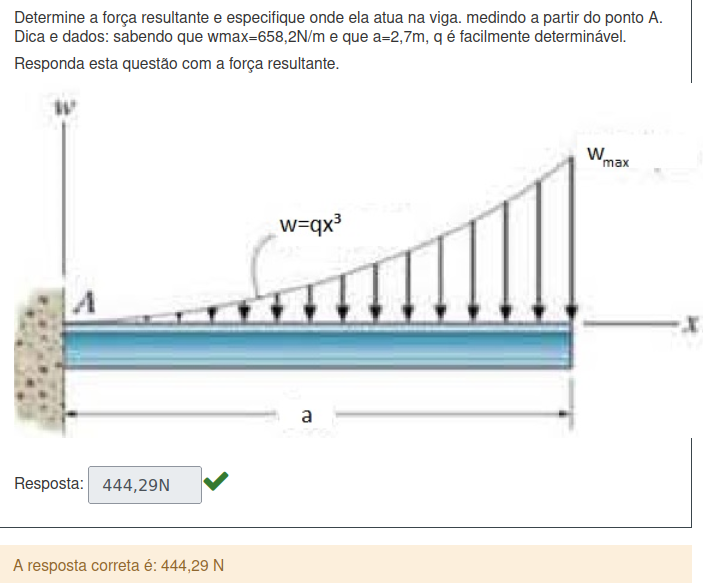

In [68]:
questao='1.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [69]:
%%write_and_run inputs/{questao}.py
wmax=658.2
a=2.7

In [70]:
%%write_and_run resolutions/{questao}.py
q=wmax/a**3
F=a*wmax/4
resposta(F,'N')

/tmp/ipykernel_21740/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
q,33.44
F,444.29


A resposta final é:


444.285N

<IPython.core.display.Math object>

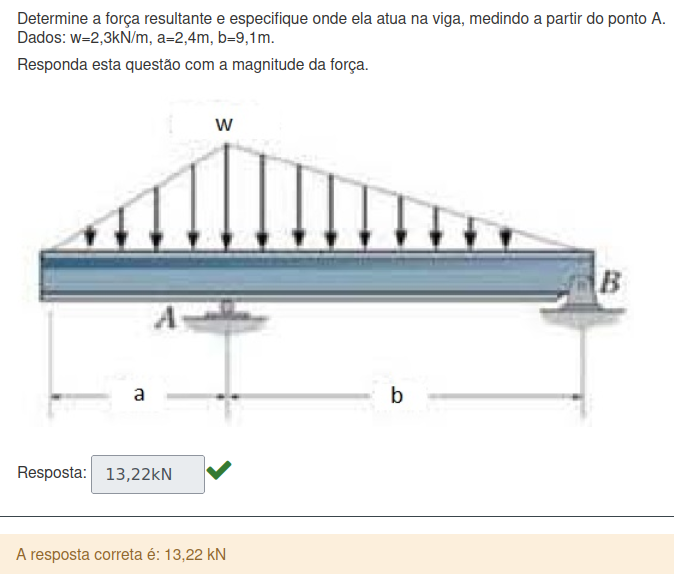

In [71]:
questao='1.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [72]:
%%write_and_run inputs/{questao}.py
w=2.3
a=2.4
b=9.1

In [73]:
%%write_and_run resolutions/{questao}.py
F2=w*b/2
F1=w*a/2
Fr=F1+F2
resposta(Fr,'kN')


/tmp/ipykernel_21740/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F2,10.46
F1,2.76
Fr,13.22


A resposta final é:


13.225kN

<IPython.core.display.Math object>

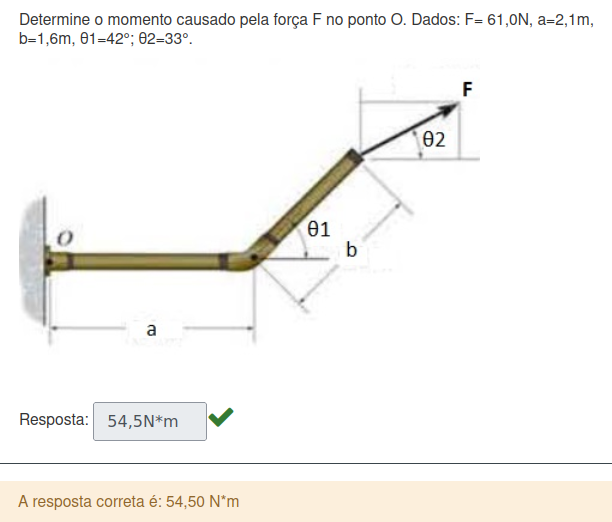

In [74]:
questao='1.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [75]:
%%write_and_run inputs/{questao}.py
F_val=61
a_val=2.1
b_val=1.6
theta1d=42
theta2d=33

In [76]:
%%write_and_run resolutions/{questao}.py
theta1_val=np.radians(theta1d)
theta2_val=np.radians(theta2d)

theta1, theta2, theta3=sy.symbols(r'\theta_1 \theta_2 \theta_3',real=True, positive=True)
F, a, b=sy.symbols(r'F a b',real=True, positive=True)
h=b*sy.sin(theta1)
L=b*sy.cos(theta1)
d=sy.sqrt(h**2+(L+a)**2)
d=d.simplify()

theta3val=sy.atan(b*sy.sin(theta1)/(b*sy.cos(theta1)+a))

Fx=F*sy.cos(theta2)
Fy=F*sy.sin(theta2)
FRx=-Fx*sy.sin(theta3)
FRy=+Fy*sy.cos(theta3)
FR=FRx+FRy
FR=sy.simplify(FR)
FR=FR.subs(theta3,theta3val)
M=FR*d
symbolVector=[F,a,b,theta1,theta2]
valuesVector=[F_val,a_val,b_val,theta1_val,theta2_val]
Mvalue=subValues(M,symbolVector,valuesVector)
FRvalue=subValues(FR,symbolVector,valuesVector)
resposta(Mvalue,'N.m')

/tmp/ipykernel_21740/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta1_val,0.73
theta2_val,0.58
h,b*sin(\theta_1)
L,b*cos(\theta_1)
d,sqrt(a**2 + 2*a*b*cos(\theta_1) + b**2)
theta3val,atan(b*sin(\theta_1)/(a + b*cos(\theta_1)))
Fx,F*cos(\theta_2)
Fy,F*sin(\theta_2)
FRx,-F*sin(\theta_3)*cos(\theta_2)
FRy,F*sin(\theta_2)*cos(\theta_3)


A resposta final é:


54.500N.m

<IPython.core.display.Math object>

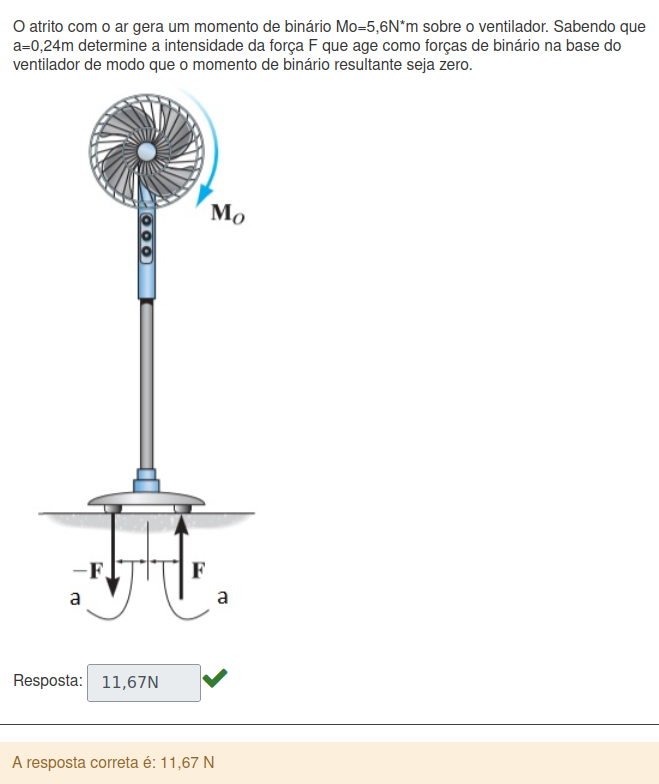

In [77]:
questao='1.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [78]:
%%write_and_run inputs/{questao}.py
Mo=5.6
a=0.24

In [79]:
%%write_and_run resolutions/{questao}.py
F=Mo/(2*a)
resposta(F,'N')


/tmp/ipykernel_21740/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F,11.67


A resposta final é:


11.667N

<IPython.core.display.Math object>

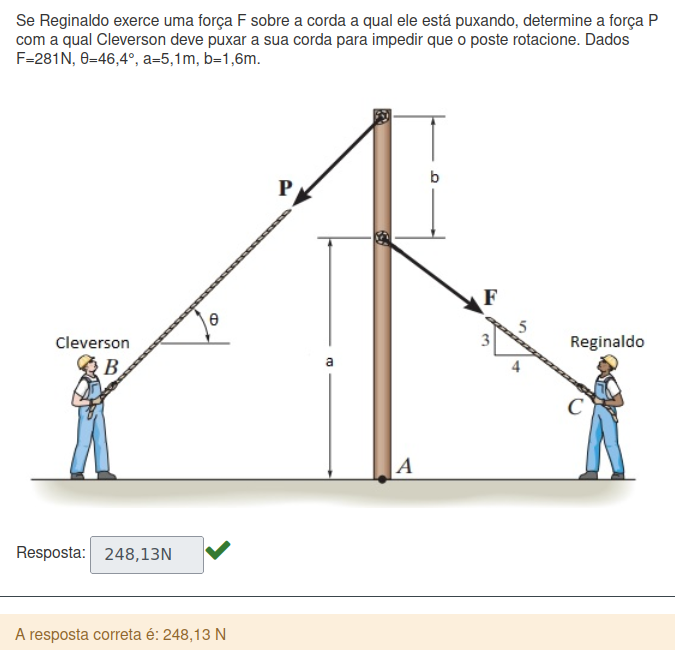

In [80]:
questao='1.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [81]:
%%write_and_run inputs/{questao}.py
F=281
thetad=46.4
a=5.1
b=1.6

In [82]:
%%write_and_run resolutions/{questao}.py
theta=np.radians(thetad)
P=4*F*a/(5*sy.cos(theta)*(a+b))
resposta(P,'N')


/tmp/ipykernel_21740/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,0.81
P,248.131624842750


A resposta final é:


248.132N

<IPython.core.display.Math object>

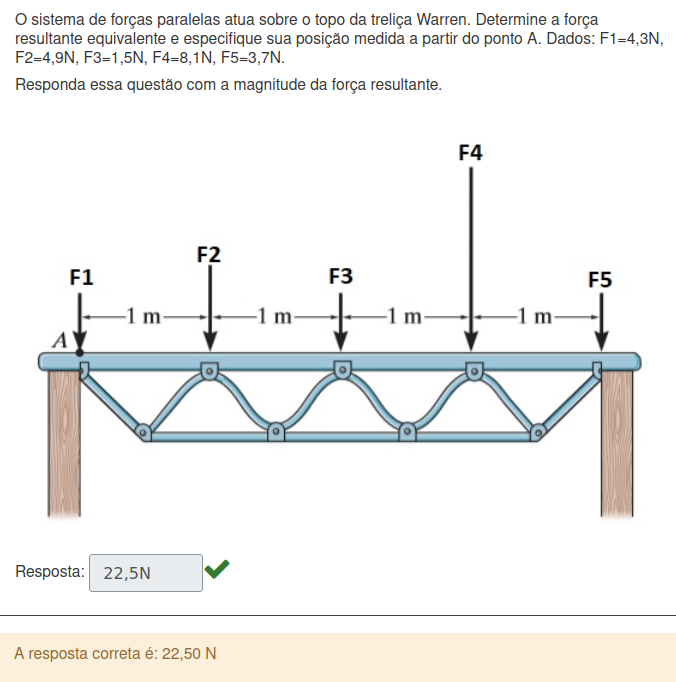

In [83]:
questao='1.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [84]:
%%write_and_run inputs/{questao}.py
F1=4.3
F2=4.9
F3=1.5
F4=8.1
F5=3.7

In [85]:
%%write_and_run resolutions/{questao}.py
FR=F1+F2+F3+F4+F5
resposta(FR,'N')

/tmp/ipykernel_21740/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
FR,22.5


A resposta final é:


22.500N

<IPython.core.display.Math object>

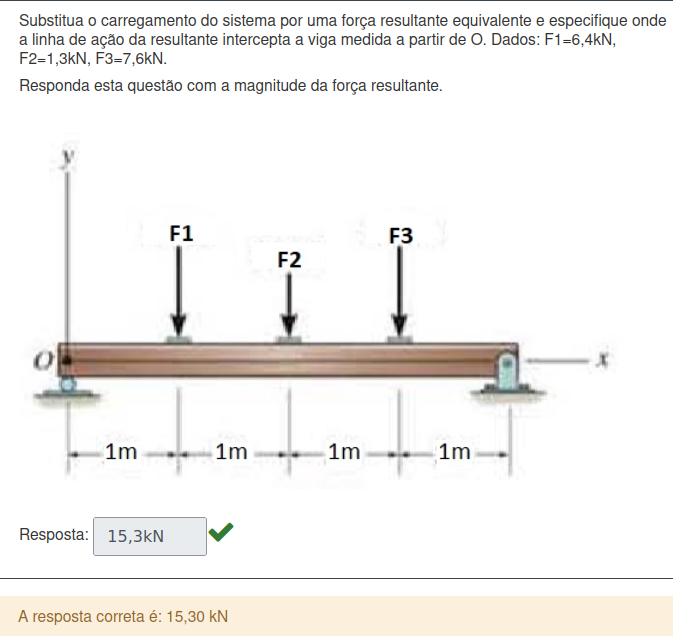

In [86]:
questao='1.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [87]:
%%write_and_run inputs/{questao}.py
F1=6.4
F2=1.3
F3=7.6

In [88]:
%%write_and_run resolutions/{questao}.py
F=F1+F2+F3
resposta(F,'kN')

/tmp/ipykernel_21740/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F,15.3


A resposta final é:


15.300kN